In [1]:
!nvidia-smi

Sun Apr 28 11:25:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60


In [2]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 325 (delta 158), reused 155 (delta 155), pack-reused 109
Receiving objects: 100% (325/325), 2.23 MiB | 4.27 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/yolov9


In [3]:
!pip install -q roboflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.6 requires opencv-python-headless>=4.9.0, but you have opencv-python-headless 4.8.0.74 which is incompatible.


## Download model weights

In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [6]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Apr 28 11:26 .
drwxr-xr-x 1 root root      4096 Apr 28 11:26 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [4]:
%cd {HOME}/yolov9

/Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/yolov9


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="qVFp4WvB3pRdoDZrA6U1")
project = rf.workspace("sweetkitty").project("parking-space-detection-poycz")
version = project.version(6)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to parking-space-detection-6 in yolov9:: 100%|█| 


## Train Custom Model

In [11]:

!python train.py \
--batch -1 --epochs 60 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

2024-04-28 12:45:39.612583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 12:45:39.612637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 12:45:39.614193: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-28 12:45:40.824390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/parking-space-detection-6/data.yaml, hyp=hyp.scratch-high.yaml, epochs=60, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, nov

## Validate Custom Model

In [5]:
dataset.location

'/Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/yolov9/parking-space-detection-6'

In [8]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device cpu \
--data {dataset.location}/data.yaml \
--weights {HOME}/best.pt

/Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/yolov9
val: data=/Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/yolov9/parking-space-detection-6/data.yaml, weights=['/Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=cpu, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.9 torch-2.1.1 CPU

Fusing layers... 
gelan-c summary: 467 layers, 25412502 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/yolov9/parking-s
val: New cache created: /Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/yolov9/parking-space-detection-6/valid/labels.cache
                 Class     Images  Instances          P          R      mAP50   Exception in thread Thread-6 (plot_ima

In [8]:
!pip install -r requirements.txt --use-deprecated=legacy-resolver

In [17]:
!python detect.py \
--img 1280 --conf 0.5  --device cpu \
--weights {HOME}/best.pt \
--source {dataset.location}/test/images

detect: weights=['/Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/best.pt'], source=/Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/yolov9/parking-space-detection-6/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.9 torch-2.1.1 CPU

Fusing layers... 
gelan-c summary: 467 layers, 25412502 parameters, 0 gradients, 102.5 GFLOPs
image 1/35 /Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/yolov9/parking-space-detection-6/test/images/-2024-03-23-20-10-01_png.rf.47088e937cbdea06e4f8d23d9360c766.jpg: 1280x1280 6 carss, 2 emptys, 2167.5ms
image 2/35 /Users/katerinkak2002/Desktop/Учеба/ВКР/YOLOv9_60/yolov9

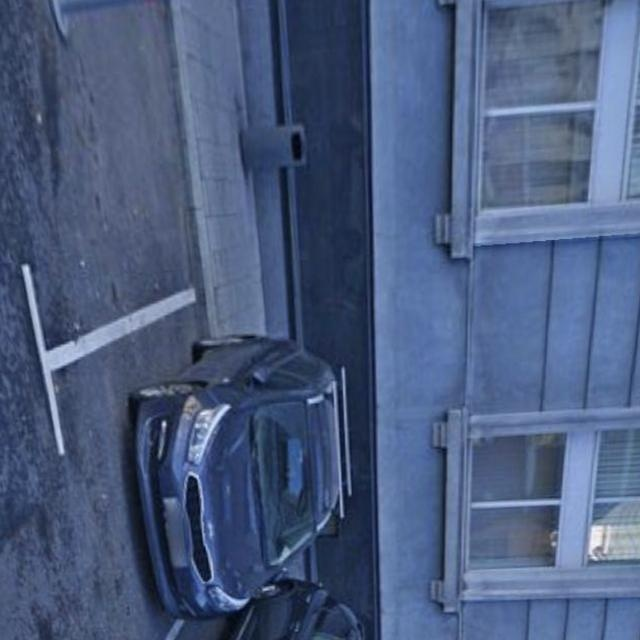

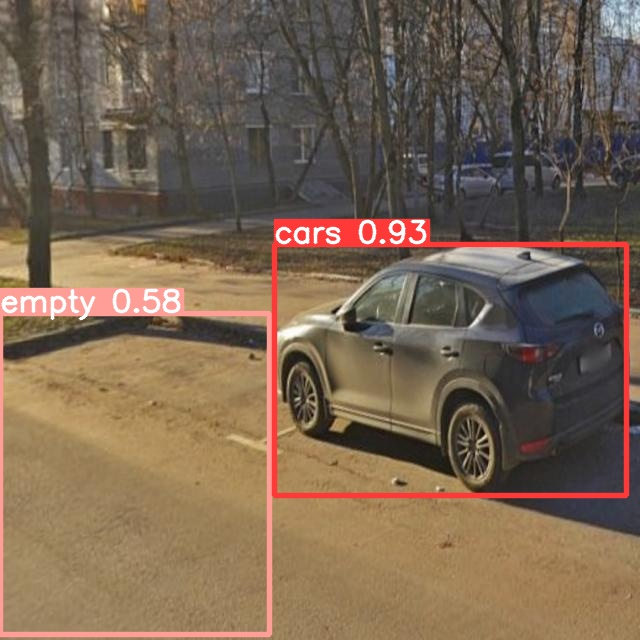

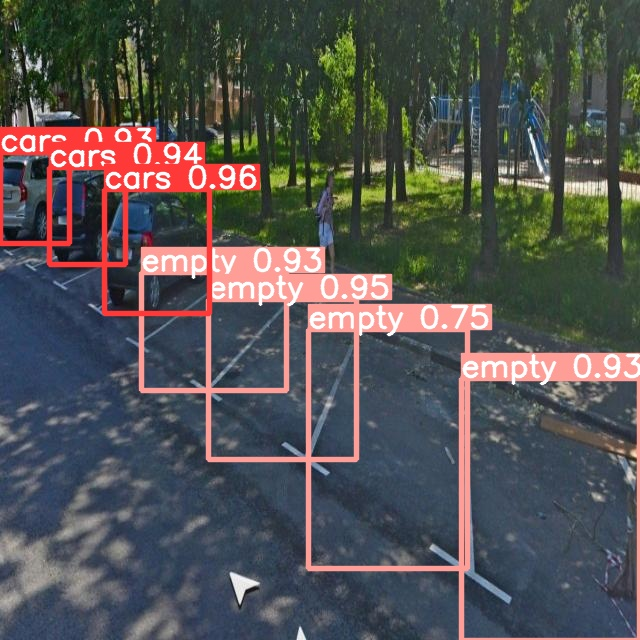

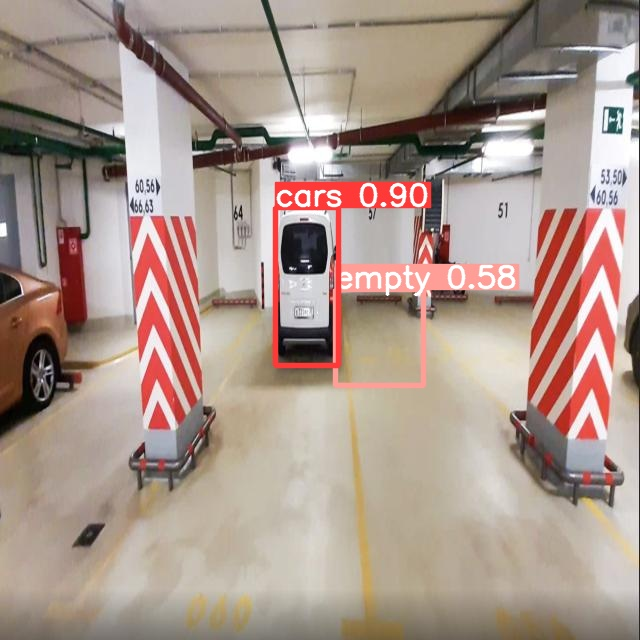

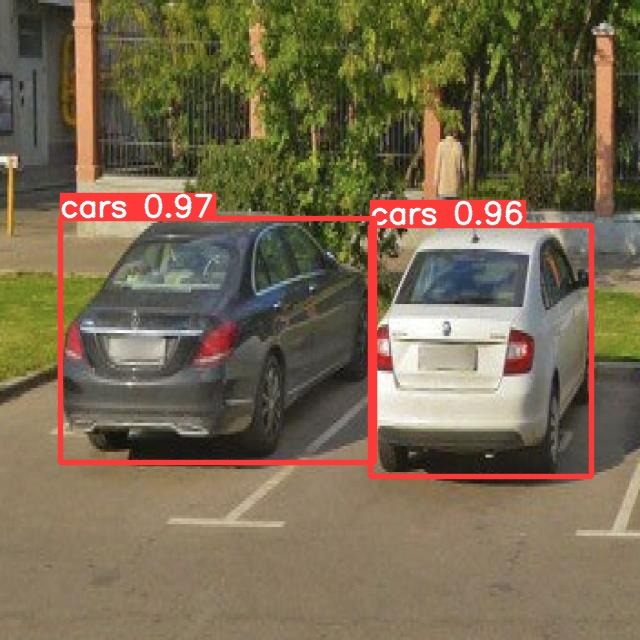

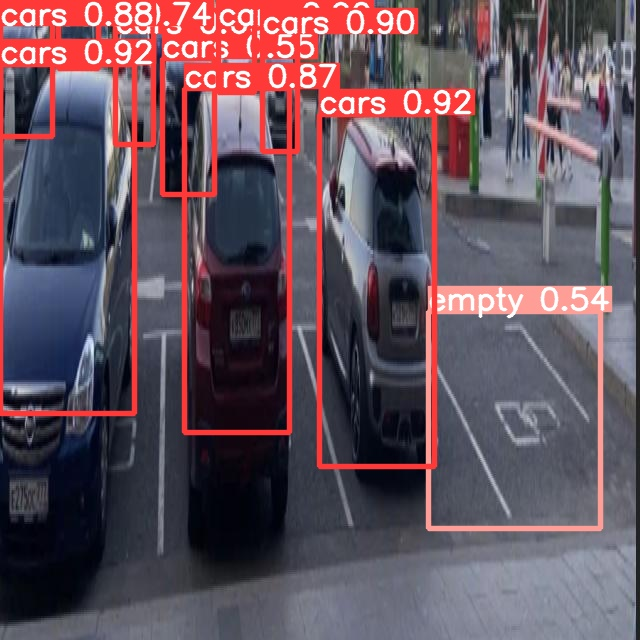

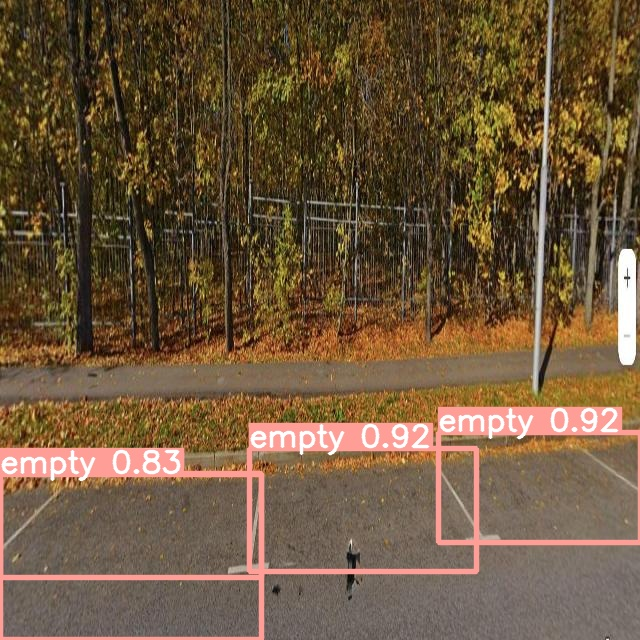

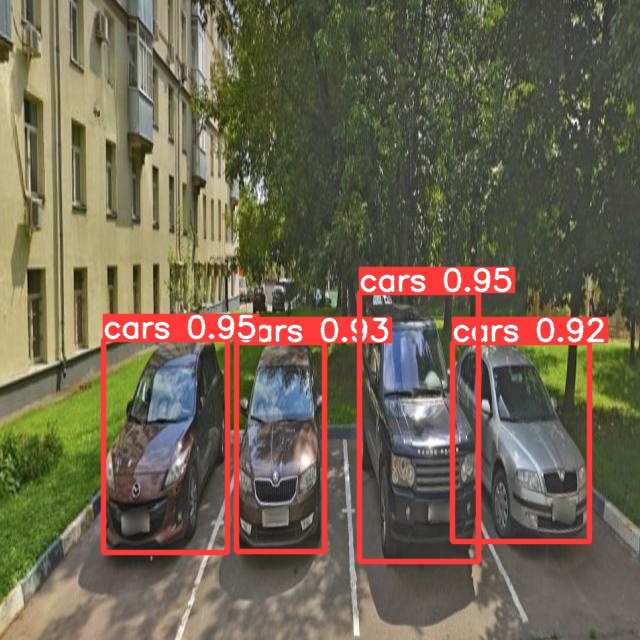

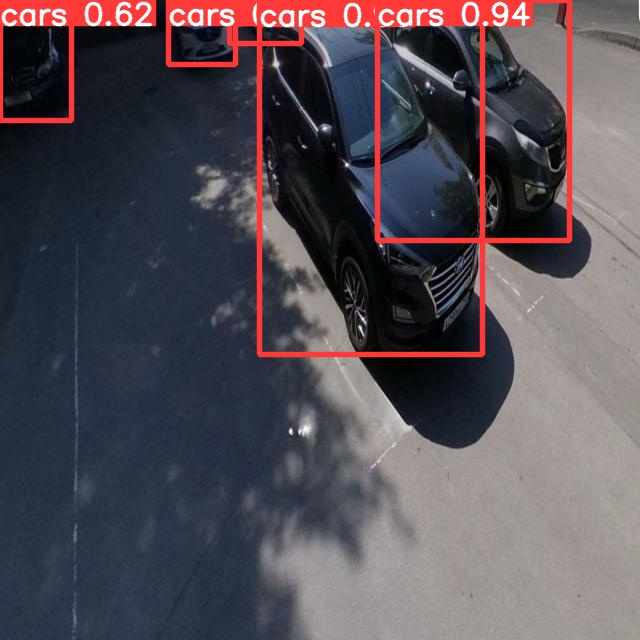

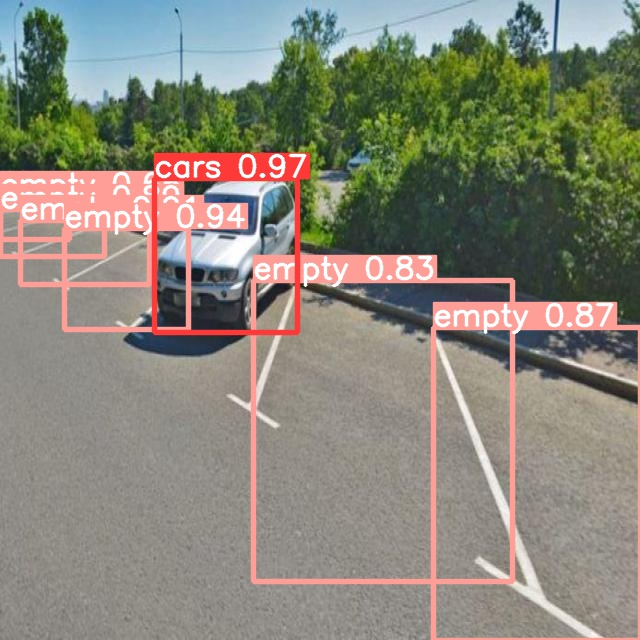

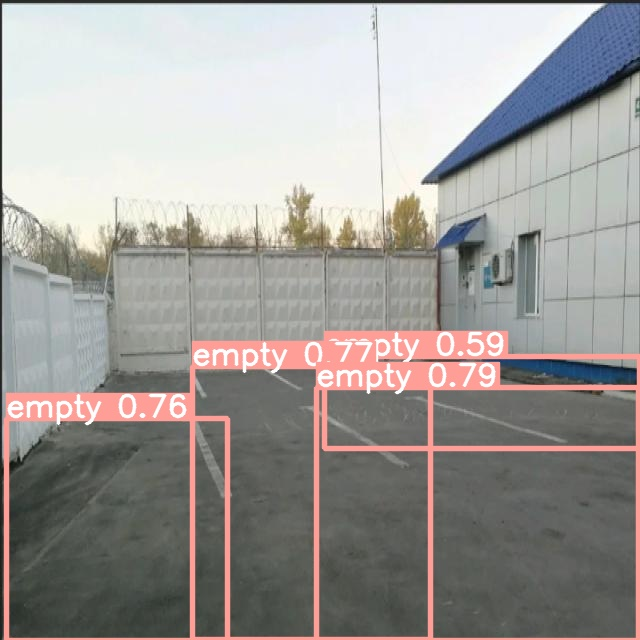

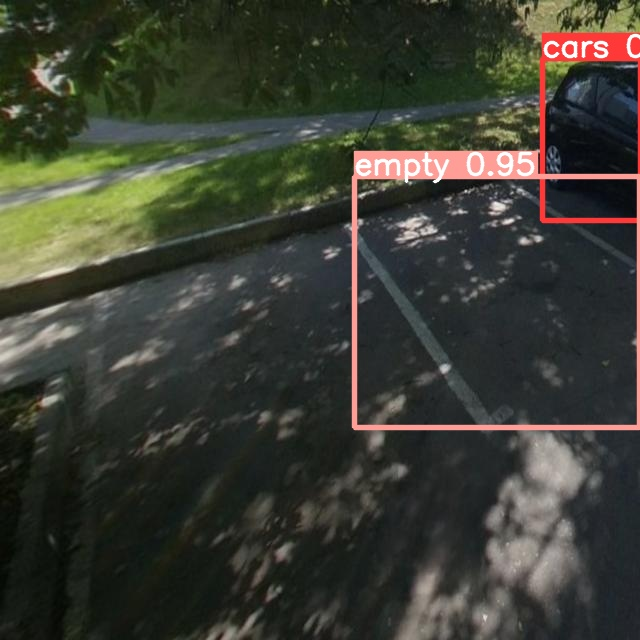

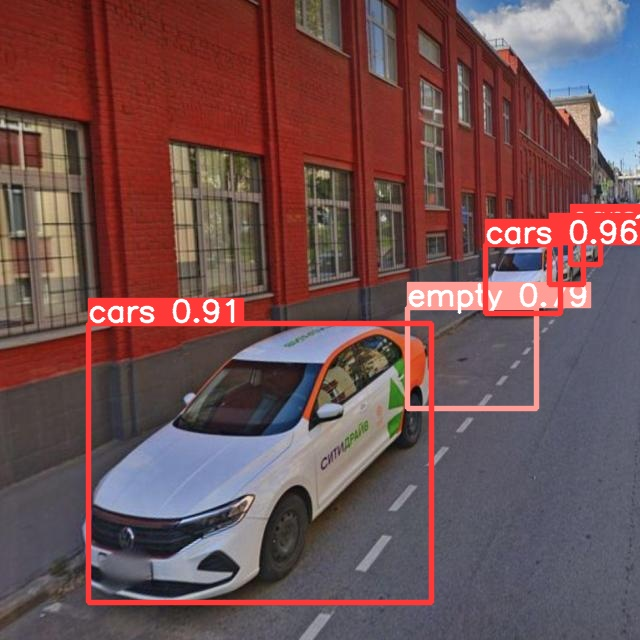

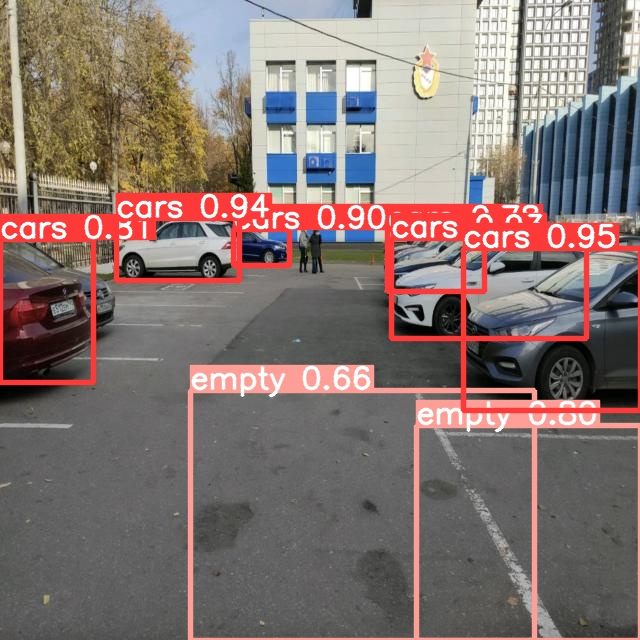

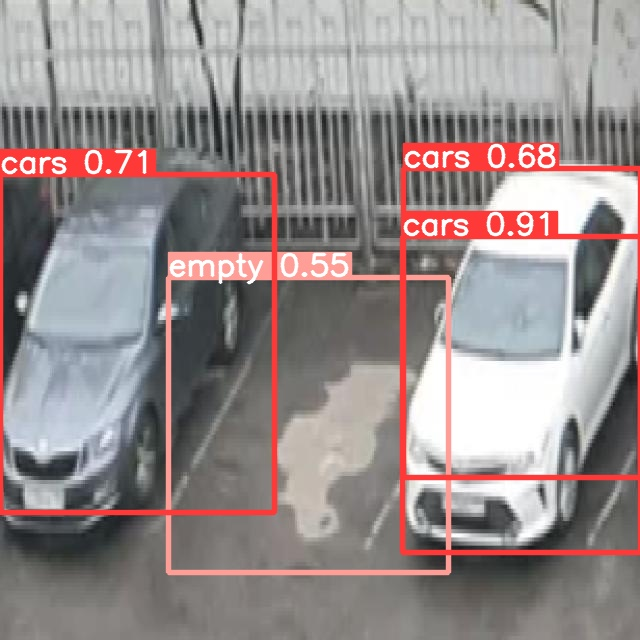

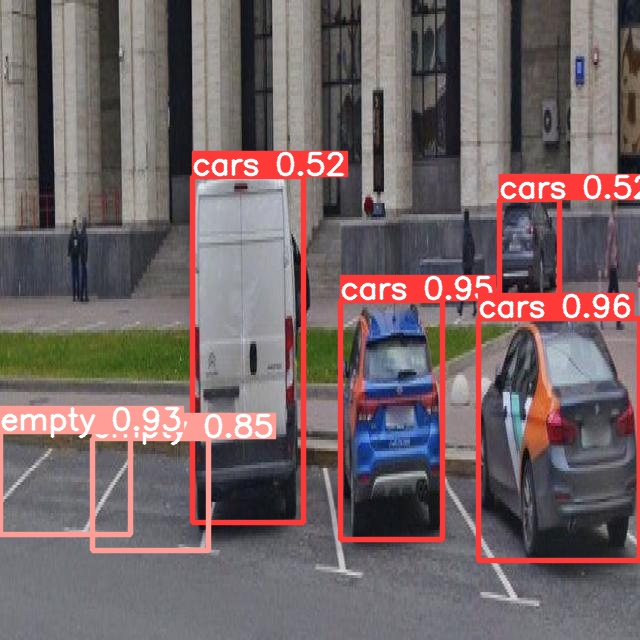

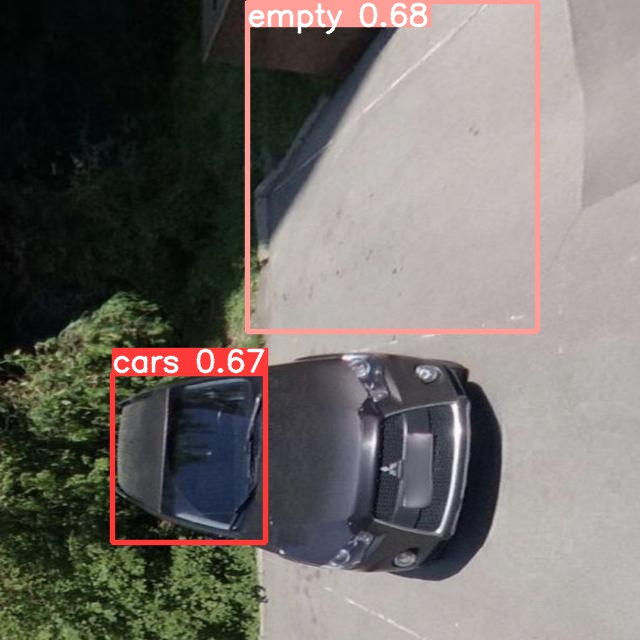

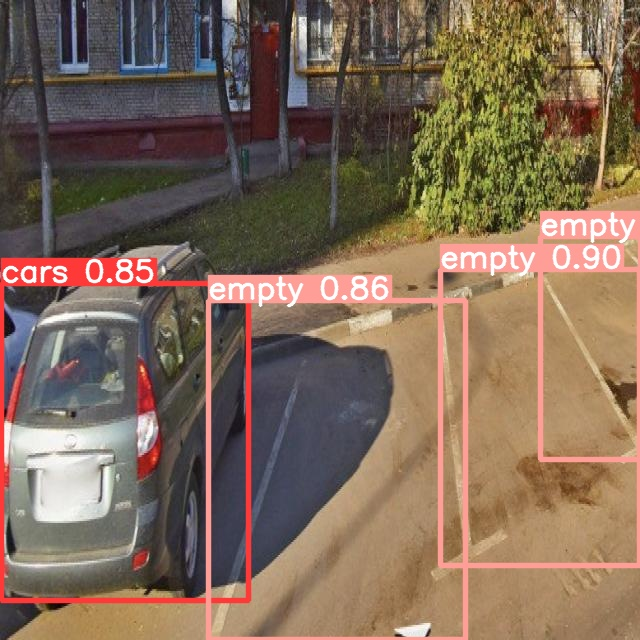

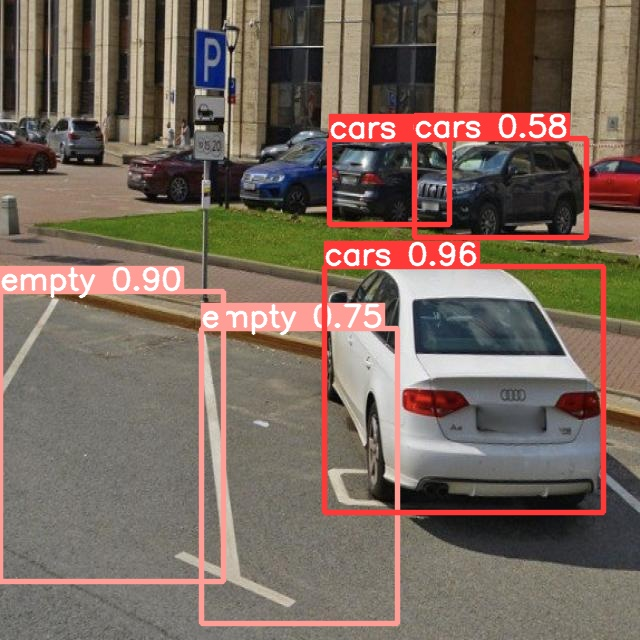

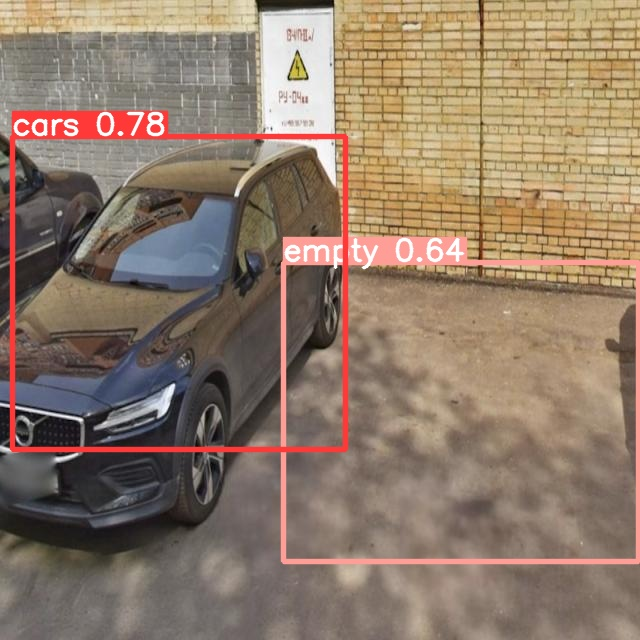

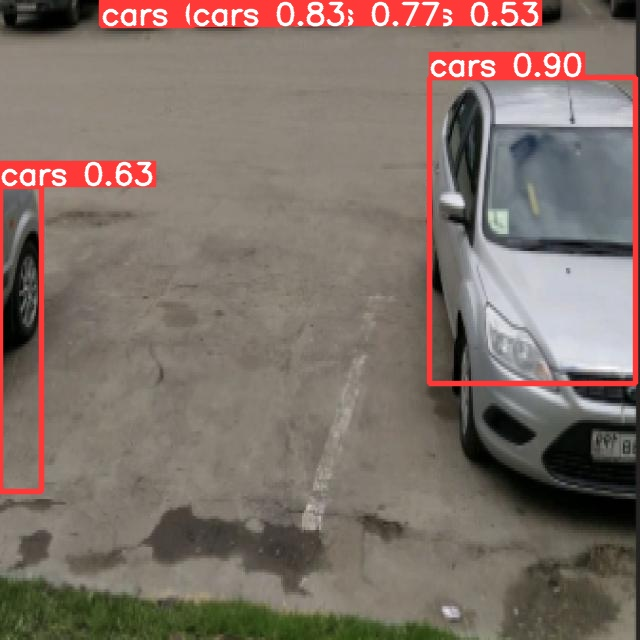

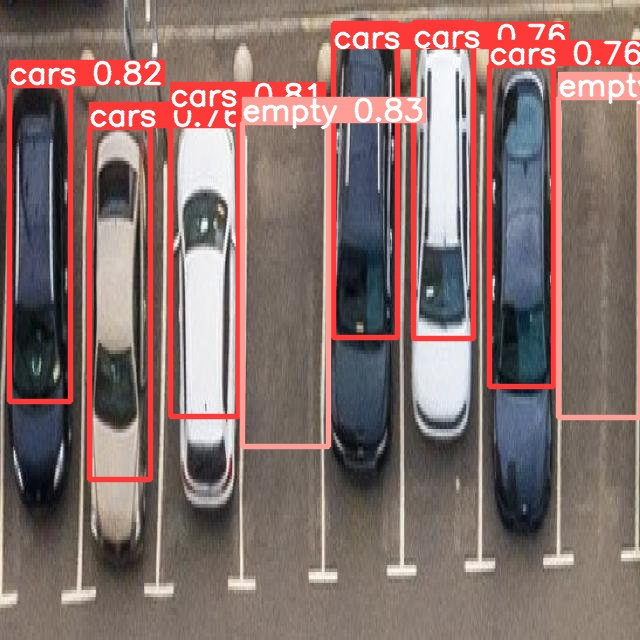

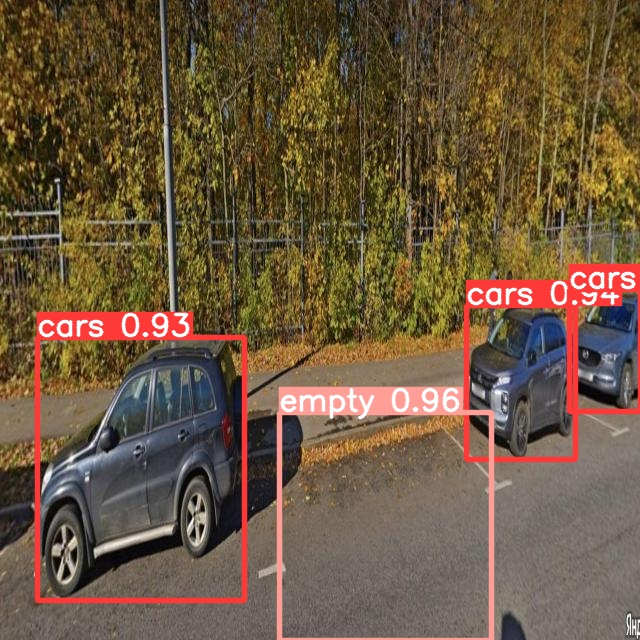

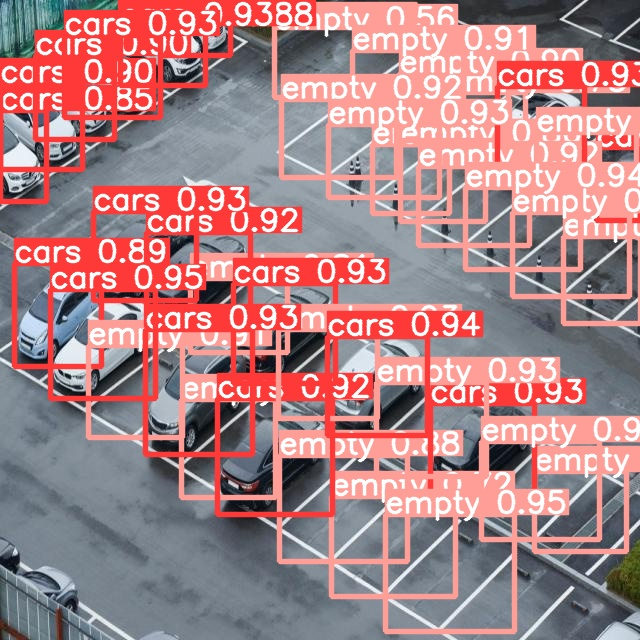

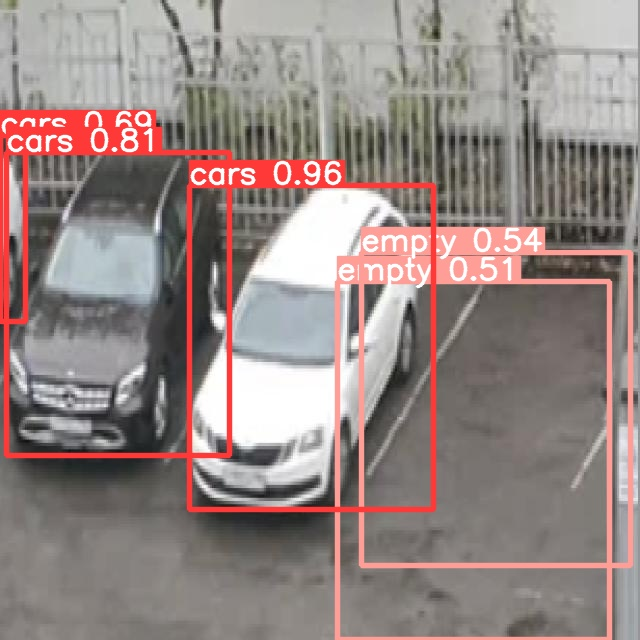

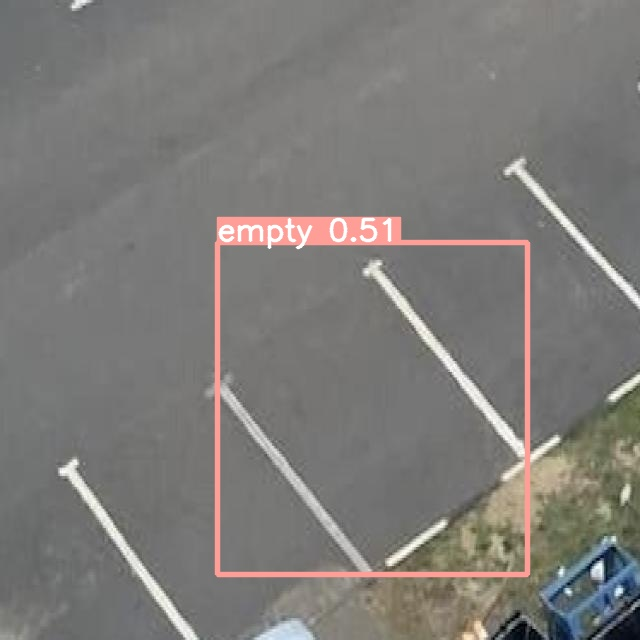

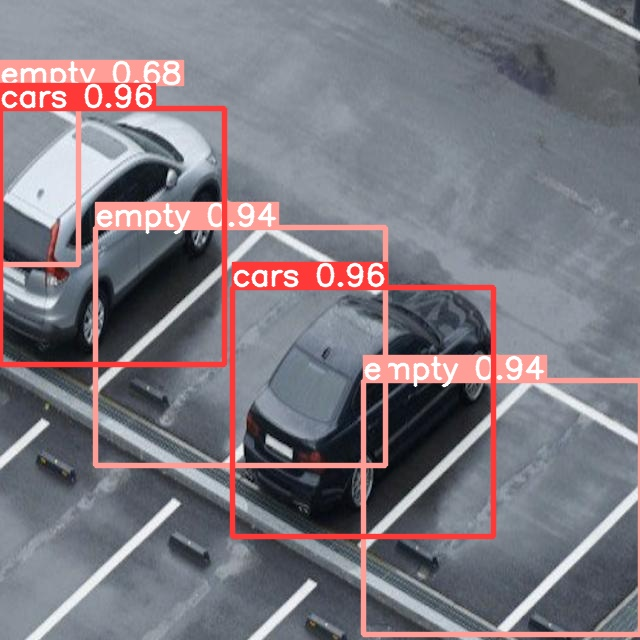

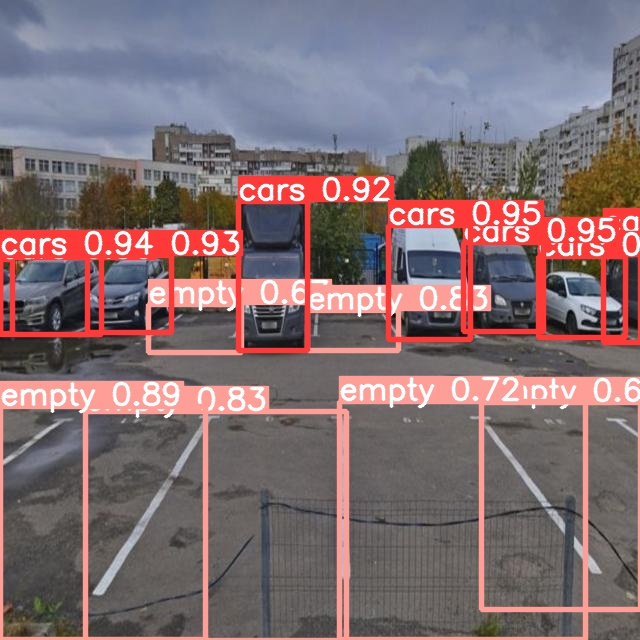

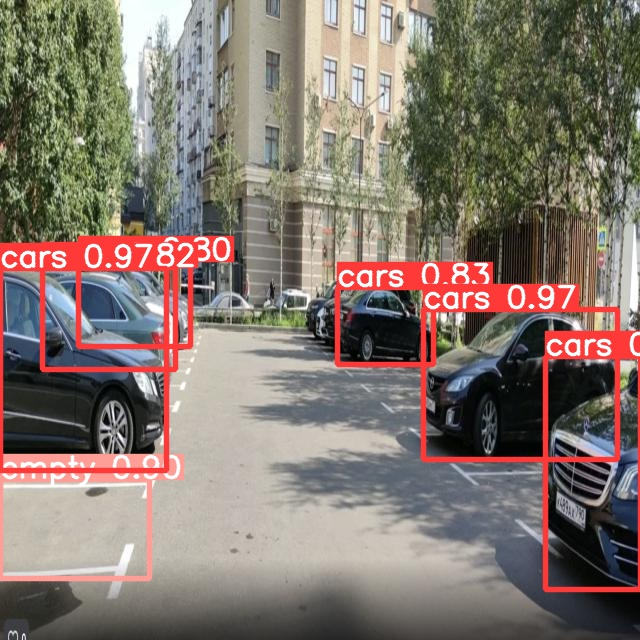

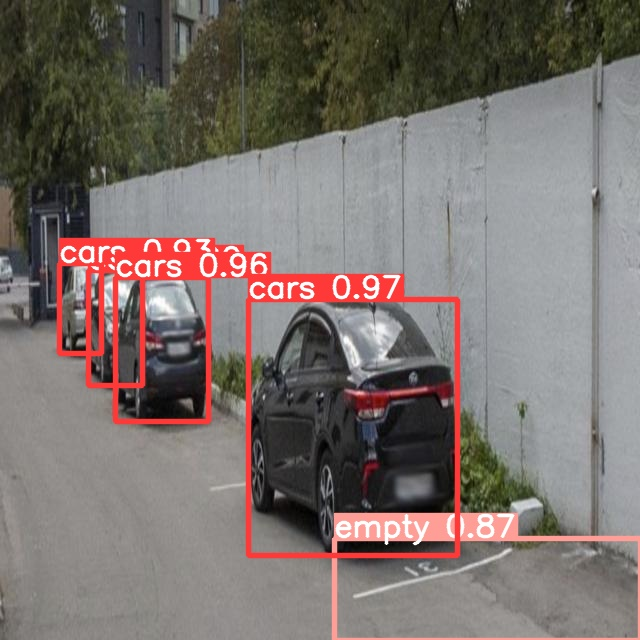

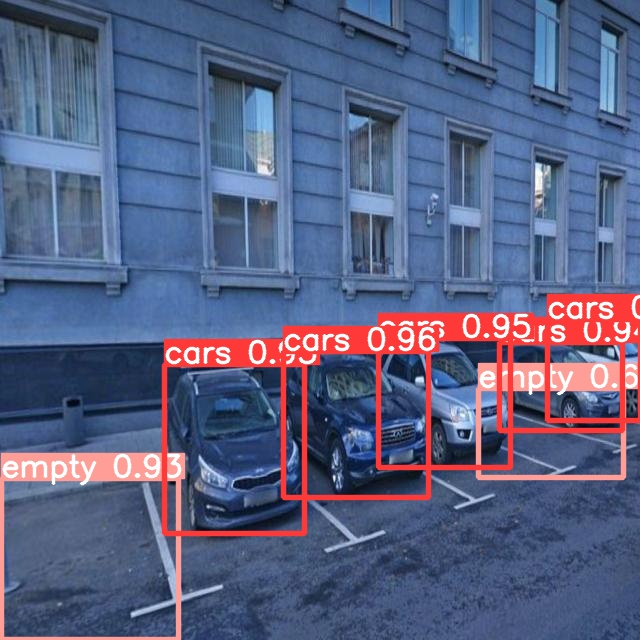

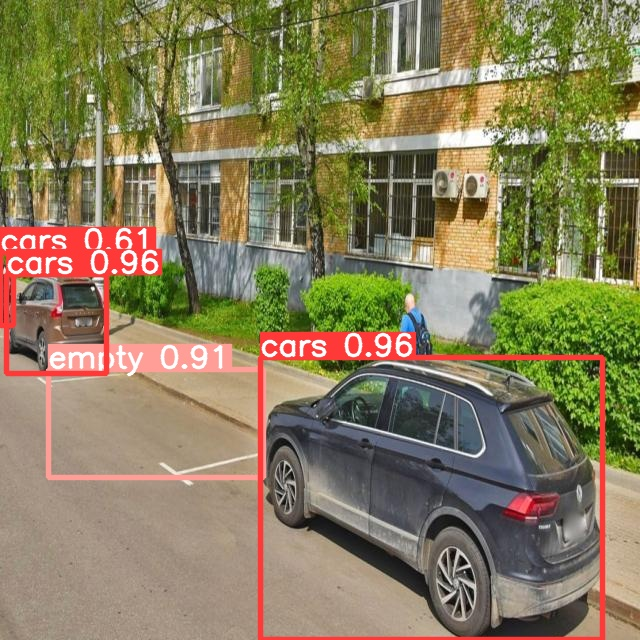

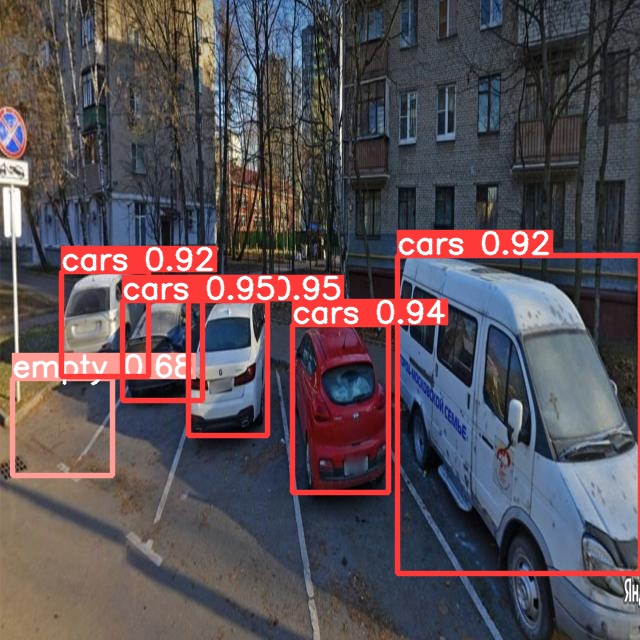

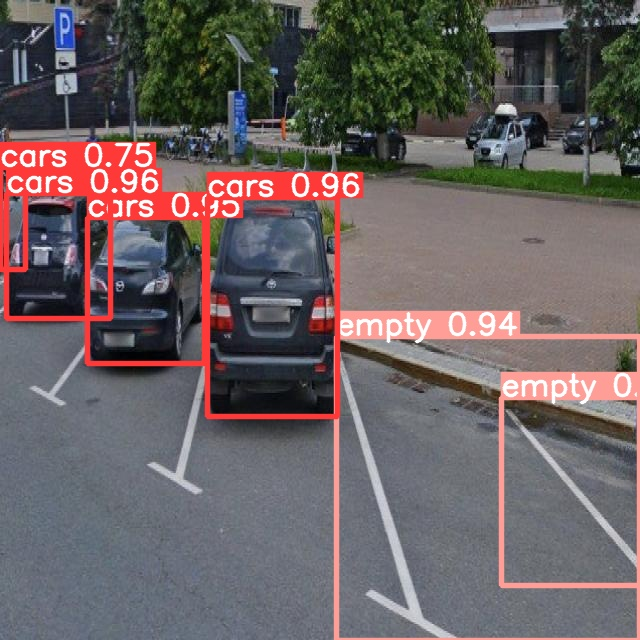

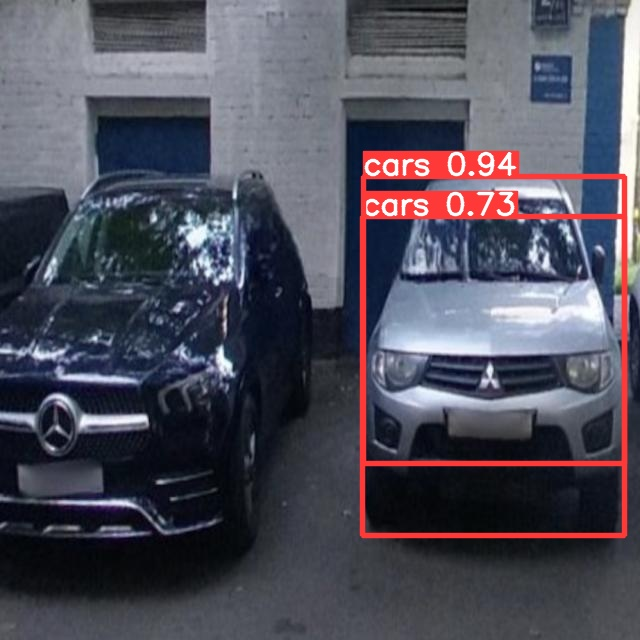

In [10]:
import glob

from IPython.display import Image, display
#данные для conf = 0.5, iou = 0.7
for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp4/*.jpg'):
      display(Image(filename=image_path, width=600))